# Assignment 4 - Clustering

## Instructions

For the Fourth Assignment, we are going to be implementing the clustering algorithms: k-Means and Agglomerative/Hierarchical clustering.

1. Each task is associated with each type of clustering mathod.
2. Each task will use its own dataset that is already written in the cell.
3. Each assignment is presenting a challenge.

### Distribution of work:
Each team memeber contributed equally and worked together in the areas where we had problems and came out with solution as a team.

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

## Task1: K-means

Run this cell to read and display top 5 rows of data

In [2]:
import pandas as pd

cluster_data = pd.read_csv("Batch1 2/Country-data.csv")
data_2 = cluster_data
cluster_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Part 1A: 5 points
Check if there are any missing values. If yes, fill them with appropriate methods. Regardless of any action, explain your decision for the action.

In [3]:
print(cluster_data.isnull().sum())

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


The above is the output of the sum of missing values for each column in the dataset. as we can see that there is no null values in the dataset, we can use the .fillna() method in pandas to fill missing values with a specific value, such as the mean, median, or mode of the colum This can be appropriate if the missing values are relatively small in number. If the missing values are larger in number or are distributed in a specific pattern, we may need to use more advanced techniques, imputation, or machine learning models to fill missing values.

### Part 1B: 10 points

Drop necessary columns that won't be used for clustering and Scale the data for further processing. Display the processed data. Explain your actions.

In [4]:
# Drop the "country" column
cluster_data = cluster_data.drop("country", axis=1)
data_1=cluster_data
# Scale the data
scaler = StandardScaler()
cluster_data = scaler.fit_transform(cluster_data)

# Display the processed data
print(cluster_data)


[[ 1.29153238 -1.13827979  0.27908825 ... -1.61909203  1.90288227
  -0.67917961]
 [-0.5389489  -0.47965843 -0.09701618 ...  0.64786643 -0.85997281
  -0.48562324]
 [-0.27283273 -0.09912164 -0.96607302 ...  0.67042323 -0.0384044
  -0.46537561]
 ...
 [-0.37231541  1.13030491  0.0088773  ...  0.28695762 -0.66120626
  -0.63775406]
 [ 0.44841668 -0.40647827 -0.59727159 ... -0.34463279  1.14094382
  -0.63775406]
 [ 1.11495062 -0.15034774 -0.33801514 ... -2.09278484  1.6246091
  -0.62954556]]


In [5]:
# Explain your actions

we need to identify which columns are not relevant for our analysis. In this case, we might consider dropping the "country" column since it is not a numerical feature and cannot be used directly for clustering. By dropping the "country" column, we remove a non-numerical feature that is not relevant for our clustering analysis. By scaling the data, we ensure that all features have a similar scale and prevent the clustering algorithm from being biased towards features with larger variances.

### Part 1C: 15 points

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method.

For this task, you need to perform the elbow method for k from 2 to 12 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). 

Explain from the graph which is the most appropriate value for k.

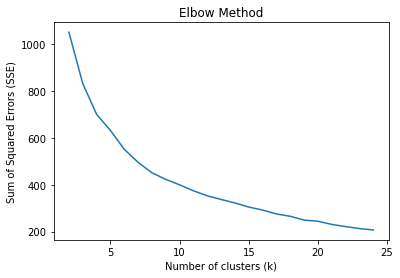

In [6]:
# Define the range of k values to test
k_values = range(2, 25)

# Initialize an empty list to store SSE values for each k
sse = []

# Fit KMeans models for each k and calculate SSE
for k in k_values:
    model = KMeans(n_clusters=k, random_state=2)
    model.fit(cluster_data)
    sse.append(model.inertia_)

# Plot the SSE for each k
plt.plot(k_values, sse)
plt.xlabel("Number of clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Elbow Method")
plt.show()


The resulting plot will show a decreasing curve with a bend at the elbow point. The elbow point is the optimal value of k. In general, we want to choose the smallest value of k that still leads to a significant reduction in SSE.

From the graph, we can observe that the bend or elbow point in the curve occurs around k=3 or k=4. Beyond k=4, the reduction in SSE is much smaller, indicating that adding more clusters does not provide much improvement. Therefore, the most appropriate value of k for this dataset is likely to be 3 or 4.

### Part 1D: 10 points

The elbow method gives an idea for which can be the most appropriate value for k. However, for cross-checking it, we use the Silhouette score to select the most appropriate value for K.

Revising what Silhouette method mean? Silhouette score is the score used to study the separation distance between the resulting clusters. The silhouette average value displays a measure of how close in average each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1]. Hence, the more score is near to +1 indicates the more clear the clusters formed are clearly visible. And the more the score tends to -1 end, the more overlapping the clusters are, which we dont want.

Apply Silhouette analysis on the same data and display the score for each K value(2-12). Explain which K value you selected from the results and why?

For k=2, Silhouette score is 0.28735668921406704
For k=3, Silhouette score is 0.28329575683463126
For k=4, Silhouette score is 0.301375962376881
For k=5, Silhouette score is 0.2992594995920442
For k=6, Silhouette score is 0.23506989275162896
For k=7, Silhouette score is 0.24905003461730515
For k=8, Silhouette score is 0.2414024552159115
For k=9, Silhouette score is 0.2034069293261364
For k=10, Silhouette score is 0.21931388763003506
For k=11, Silhouette score is 0.1979613096161359
For k=12, Silhouette score is 0.20602646495525875


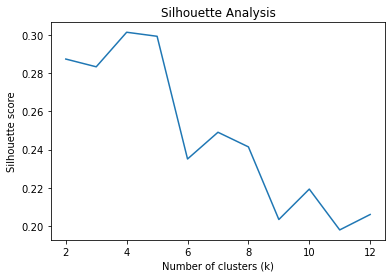

In [7]:
# Define the range of k values to test
k_values = range(2, 13)

# Initialize an empty list to store Silhouette scores for each k
silhouette_scores = []

# Fit KMeans models for each k and calculate Silhouette scores
for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(cluster_data)
    score = silhouette_score(cluster_data, labels)
    silhouette_scores.append(score)
    print("For k={}, Silhouette score is {}".format(k, score))

# Plot the Silhouette scores for each k
plt.plot(k_values, silhouette_scores)
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette score")
plt.title("Silhouette Analysis")
plt.show()


The resulting plot will show a curve of Silhouette scores for each k. The optimal value of k is the one that maximizes the Silhouette score.

In [8]:
# Interpret!

From the Silhouette scores, we can see that the highest score is achieved when k=4, which means that the data points are well-separated into four clusters. However, the Silhouette scores for k=2 and k=5 are also close to the highest score, indicating that these values are also appropriate. Therefore, based on the Silhouette analysis, we can select either k=2, k=4, or k=5 as the optimal number of clusters.

According to the Silhouette analysis, the highest score is achieved for k=4, which is 0.301375962376881. This indicates that the clusters formed with k=4 are well-separated and distinct. Therefore, we can choose k=4 as the appropriate number of clusters for this dataset.

### Part 1E: 10 points

With the best K value use K-means algorithm on the data. Print out the whole data along with the cluster labels assigned for each row in the form of new column.

The cluster labels will be added to the original data as a new column named "Predicted_cluster" and the K-means algorithm will be applied with the best K value. The tagged data will then be printed in its entirety, together with the original columns and cluster labels.

hat being said, k=4 is a common choice for k-means clustering because it strikes a balance between having too few clusters (which may oversimplify the data) and having too many clusters (which may overfit the data). Additionally, many real-world datasets tend to exhibit a natural clustering structure that can be captured well with four clusters.

However, it is important to note that the choice of k should be made based on domain knowledge, intuition, and experimentation with different values of k to see which value results in the most meaningful and useful clustering results.

In [9]:
#k=4 (best value of k)
#cluster_dataPredicted_cluster
k_means = KMeans(n_clusters=4)
#Run the clustering algorithm
model = k_means.fit(cluster_data)

#Generate cluster predictions and store in y_hat
y_hat = k_means.predict(cluster_data)
y_hat
data_2['Predicted_cluster']=y_hat
data_2

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Predicted_cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


### Part 1F: 10 points

For each cluster that is formed, display the average value for each column from the dataset. Remember to use right dataset!

Most importantly, interpret the results that you just displayed. Interpret, do not read out the results again!
The output of a clustering analysis typically includes the following:
Cluster labels: Each data point is assigned a label indicating which cluster it belongs to.
Cluster centroids: The coordinates of the center point of each cluster.
To assign clustering values to the output of a dataset, you can use the cluster labels to create a new column in the dataset that indicates the cluster assignment for each data point. 

In [10]:
data_labeled = data_1.assign(cluster=data_2['Predicted_cluster'])

# group the data by cluster label and calculate the mean of each column
cluster_means = data_labeled.groupby('cluster').mean()
cluster_means

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster,,,,,,,,,
0,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979
1,21.389655,41.290678,6.235862,48.038689,12968.620690,7.413460,72.935632,2.286552,6919.103448
2,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667
3,4.953333,45.826667,9.168667,39.736667,45250.000000,2.742200,80.376667,1.795333,43333.333333


In [11]:
# Interpret your results

### Part 1G: 5 points

Display top 5 countries within each group/cluster. If there aren't enough countries within that cluster, just display that many.

To display the top 5 countries within each group/cluster, you can use the cluster labels generated from the clustering analysis and group the countries by their cluster label. Then, you can compute a metric such as the mean or median of a certain variable (e.g., population, GDP) for each country within each cluster and rank the countries based on that metric. Finally, you can select the top 5 countries with the highest values of that metric within each cluster and display them.

Here's an example of how to do this in Python using the pandas library:

In [12]:

cluster_labels = data_2['Predicted_cluster'].unique()
a=['child_mort','exports','health','imports','income','inflation','life_expec','total_fer']
for i in a:
    print('***************************************************************')
    print('Based don value',i)
    print('***************************************************************')
    for label in cluster_labels:
        # select the data points in this cluster
        cluster_data = data_2[data_2['Predicted_cluster'] == label]
        # sort the data points by their value in the first column (change this to the appropriate column)
        sorted_data = cluster_data.sort_values(by=i, ascending=False)
        # select the top 5 countries (or fewer, if there aren't enough)
        top_countries = sorted_data['country'].head(5)
        # print the cluster label and the top countries
        print(f'Cluster {label}: {", ".join(top_countries)}')


***************************************************************
Based don value child_mort
***************************************************************
Cluster 0: Haiti, Sierra Leone, Chad, Central African Republic, Mali
Cluster 1: Myanmar, Turkmenistan, India, Tajikistan, Bangladesh
Cluster 3: Kuwait, Brunei, Qatar, United Arab Emirates, United States
Cluster 2: Malta, Luxembourg, Singapore
***************************************************************
Based don value exports
***************************************************************
Cluster 0: Equatorial Guinea, Congo, Rep., Angola, Gabon, Mauritania
Cluster 1: Seychelles, Malaysia, Hungary, Maldives, Turkmenistan
Cluster 3: Ireland, United Arab Emirates, Belgium, Netherlands, Brunei
Cluster 2: Singapore, Luxembourg, Malta
***************************************************************
Based don value health
***************************************************************
Cluster 0: Sierra Leone, Liberia, Burundi, Kiribati, L

### Part 1F: 5 points

Plot health vs life-expec and shade each point belonging to it's respective cluster.

Using this code, a scatter plot of health vs. life expectancy will be produced, with each point's color denoting its cluster label. The plot's title is "K-Means Clustering," and the x-axis and y-axis are both labeled "Life Expectancy" and "Health," respectively. It will also use the enumerate() function to mark each data point with its appropriate index. The labels, title, and annotation can all be changed as necessary.

It should be noted that this presupposes your data include columns like "life-expect" and "health." You will need to adjust the code if the column names in your data differ.







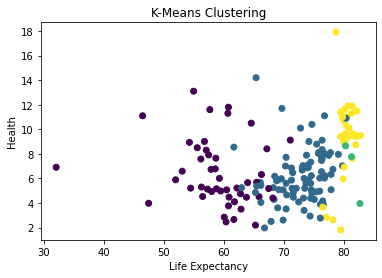

In [13]:
plt.scatter(data_2['life_expec'], data_2['health'], c=data_2['Predicted_cluster'])
plt.xlabel('Life Expectancy')
plt.ylabel('Health')
plt.title('K-Means Clustering')
plt.show()



## Task2: Hierarchical Clustering

Simply run the cell to read the data and plot it.

In [14]:
data = pd.read_csv('Batch1 2/co-ordinates.csv')
data.head()

,X,Y
0,-10.288860,-3.480595
1,-11.025979,-4.267757
2,-9.242627,-3.115357
3,9.572838,-0.395079
4,-6.625216,-8.221243


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       200 non-null    float64
 1   Y       200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [16]:
#Describe gives the statistics of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
X,200.0,-2.927865,5.865891,-11.806387,-7.524261,-4.741357,0.556260,10.066905
Y,200.0,1.380736,5.560913,-10.542946,-3.047170,2.510033,6.273324,11.569663


<Figure size 1000x800 with 0 Axes>

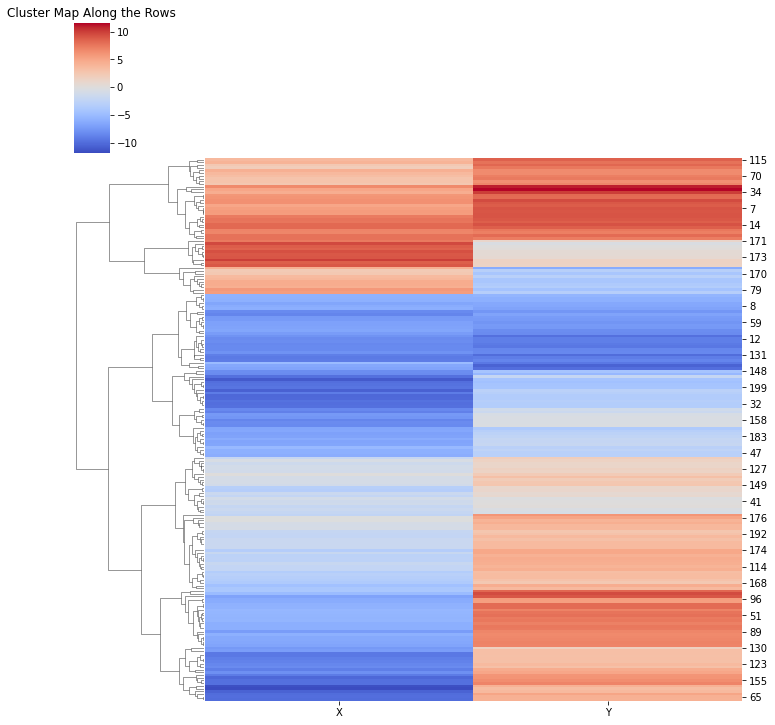

In [17]:
#Plotting a clustermap along the row values which merges the similar values based on correlation
plt.figure(figsize=(10,8),dpi=100)
sns.clustermap(data,col_cluster=False, cmap='coolwarm')
plt.title('Cluster Map Along the Rows');

### Part 2A: 5 points

Plot the co-ordinates from the imported data and guess possible clusters that could be formed.

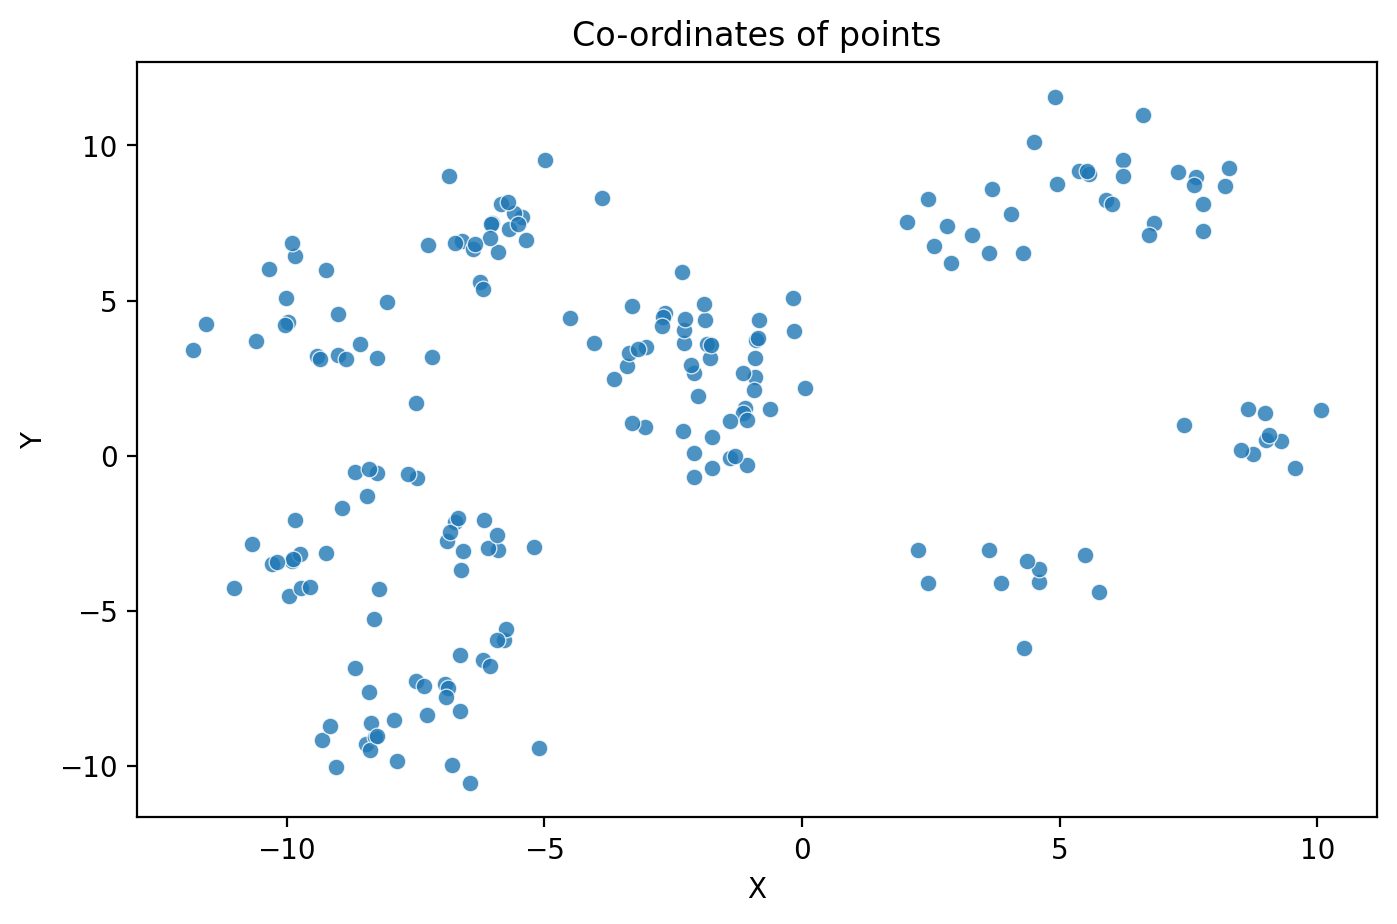

In [18]:
plt.figure(figsize=(8,5),dpi=200)
sns.scatterplot(data=data,x='X',y='Y',alpha=0.8)
plt.title('Co-ordinates of points');

In [19]:
# guess the possible clusters. Explain your guess

### My Guess:
In my point of view I think the possible number of clusters is 8, because I can see 8 group of cluster data that is separable from other clusters with some distance. 

### Part 2B: 15 points

Using Hierarchical clustering with euclidean + ward and manhattan + average, display the results for clusters 4,5,6 and 7. Add tittle for each plot.

From the results, what according to you should be the appropriate value of K and for which pair of affinity and linkage? Interpret your results. Did this match with your previous guess?

### Hierarchical clustering is available in scikitlearn as AgglomerativeClustering

In [20]:
from sklearn.cluster import AgglomerativeClustering

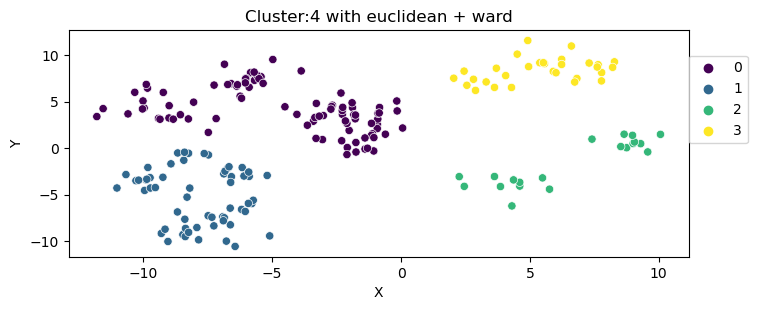

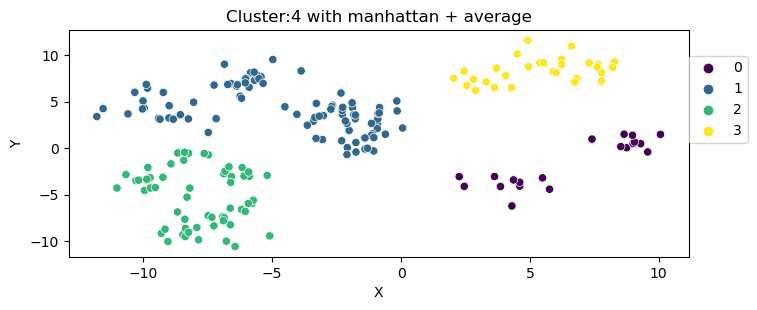

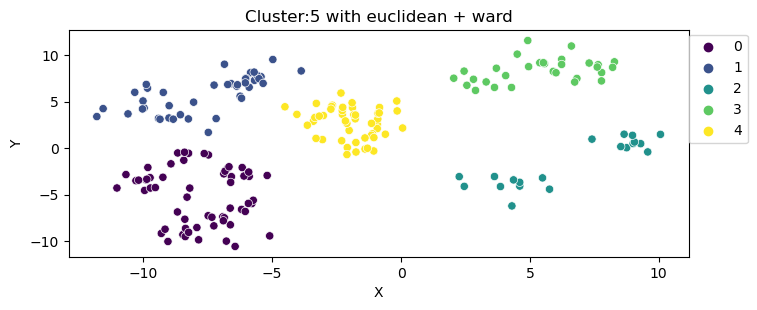

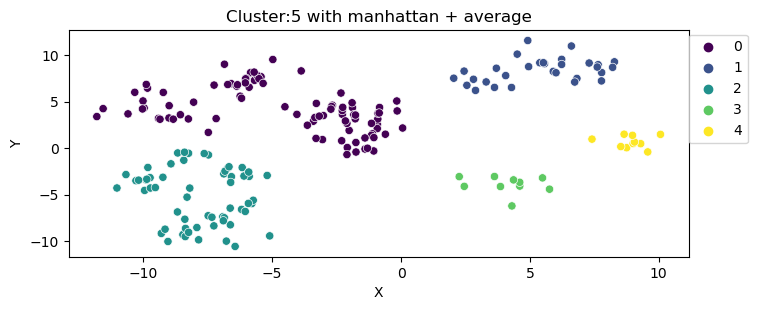

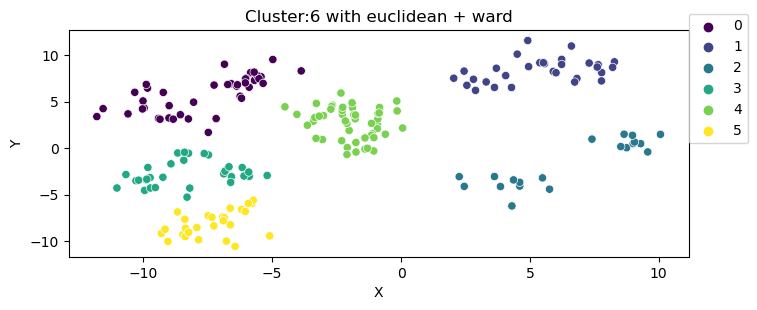

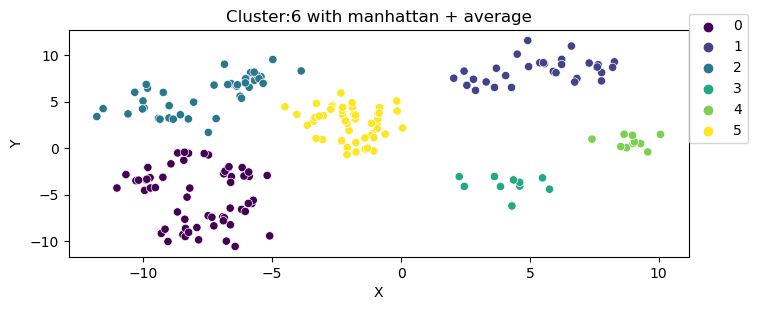

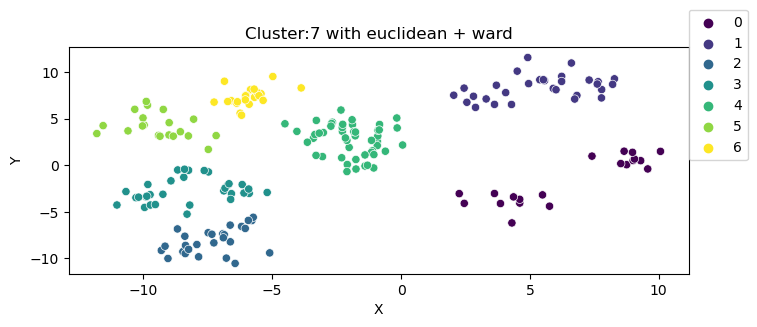

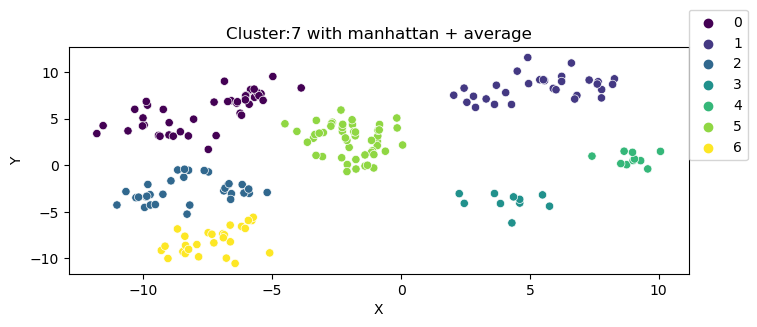

In [21]:
#Given number of clusters
n_clusters=[4,5,6,7] 
affinities= ['euclidean','manhattan'] #Affinitiy values
linkages= ['ward', 'average'] #Linkage values

#Creating a nested for loop with cluster values and a pair of afffinity, linkages to build a model and plotting the values
for i in n_clusters:
    for j in zip(affinities,linkages):
        hierarchial_model=AgglomerativeClustering(n_clusters=i, affinity=j[0], linkage=j[1])
        label=hierarchial_model.fit_predict(data)
        plt.figure(figsize=(8,3),dpi=100)
        sns.scatterplot(data=data,x='X',y='Y',hue=label,palette='viridis')
        plt.title(f'Cluster:{i} with {j[0]} + {j[1]}')
        plt.legend(loc=(1,0.5))

In [22]:
# interpret your results. Explain your selection

### I think cluster from the given values of k that is 4,5,6,7 my ideal choice would be 6 with manhattan affinity and average  linkage, because that clearly separates cluster 3 and 4 when compred to other model. when we take k as 7 it predicts well for cluster 3,4 in manhattan, average not for cluster. In case of euclidean ward, it does not separate cluster 0. It is not matching  with the guess because we are only using the values till 7 in that our guess is not present, so we are creating a model and pltting below to check it

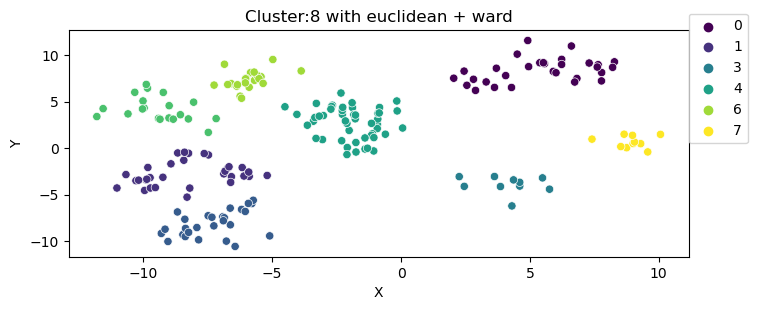

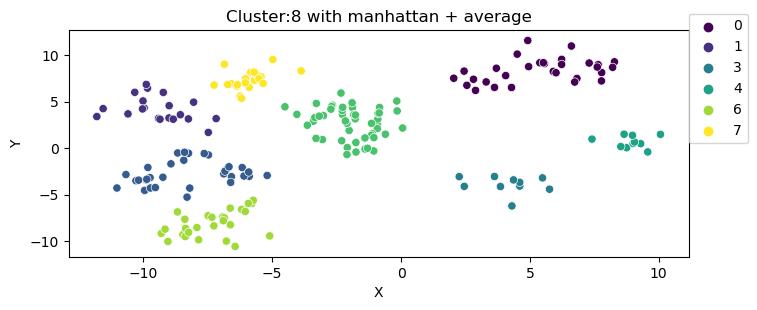

In [23]:
#Creating  for loop with cluster value 8 and a pair of afffinity, linkages to build a model and plotting the values
affinities= ['euclidean','manhattan']
linkages= ['ward', 'average']
for j in zip(affinities,linkages):
    hierarchial_model=AgglomerativeClustering(n_clusters=8, affinity=j[0], linkage=j[1])
    label=hierarchial_model.fit_predict(data)
    plt.figure(figsize=(8,3),dpi=100)
    sns.scatterplot(data=data,x='X',y='Y',hue=label,palette='viridis')
    plt.title(f'Cluster:{8} with {j[0]} + {j[1]}')
    plt.legend(loc=(1,0.5))

### Here for cluster 8, that is our guess we it is evident that we are clearly separtaing the clusters that we guessed  in both the affinity and linkage metrics.

### Part 2C: 10 points

For your Selection of K, display the dendogram for the analysis and plot line where K clusters are formed. Give proper Title.

### For my selection k that is is 6 with manhattan and average metrics we are plotting the scatterplot 

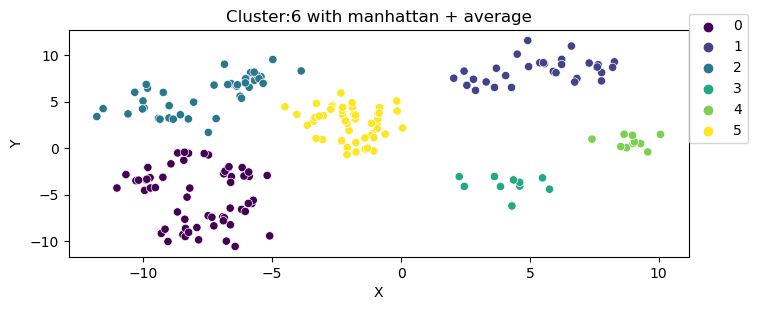

In [24]:
hierarchial_model_01=AgglomerativeClustering(n_clusters=6, affinity='manhattan', linkage='average')
label=hierarchial_model_01.fit_predict(data)
plt.figure(figsize=(8,3),dpi=100)
sns.scatterplot(data=data,x='X',y='Y',hue=label,palette='viridis')
plt.title(f'Cluster:{6} with {j[0]} + {j[1]}')
plt.legend(loc=(1,0.5))

In [25]:
#importing necessary libaraies for crareting linkage matrix and to create dendrogarm
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram

### Creating a linkeage matrix_01 that takes, the linkage matrix gives the matrix values with the points that are merging in ascending odder with distance and number of clusters below them

In [26]:
#creating linkage matrix for cluster 6 and metrics manhattan and average
linkage_matrix_01=hierarchy.linkage(hierarchial_model_01.children_)

In [27]:
linkage_matrix_01

array([[161.        , 176.        ,   1.41421356,   2.        ],
       [173.        , 199.        ,   1.41421356,   3.        ],
       [ 84.        , 120.        ,   2.23606798,   2.        ],
       [ 52.        ,  55.        ,   2.23606798,   2.        ],
       [  6.        ,  31.        ,   2.23606798,   2.        ],
       [ 80.        , 109.        ,   2.23606798,   2.        ],
       [ 85.        ,  95.        ,   2.23606798,   2.        ],
       [137.        , 159.        ,   2.23606798,   2.        ],
       [185.        , 187.        ,   2.23606798,   2.        ],
       [196.        , 197.        ,   2.23606798,   2.        ],
       [ 28.        , 117.        ,   2.82842712,   2.        ],
       [193.        , 194.        ,   2.82842712,   2.        ],
       [ 93.        , 116.        ,   3.16227766,   2.        ],
       [104.        , 134.        ,   3.16227766,   2.        ],
       [182.        , 207.        ,   3.16227766,   3.        ],
       [ 27.        ,  54

### Creating a dendrogarm for the entire dataset and from out selection of k value from the given one that is 6 we are creating a line where 6 clusters are formed and it makes sense when we consider the rule for selection of clusters that is longestet vertical line that has no horizontal line passing through it

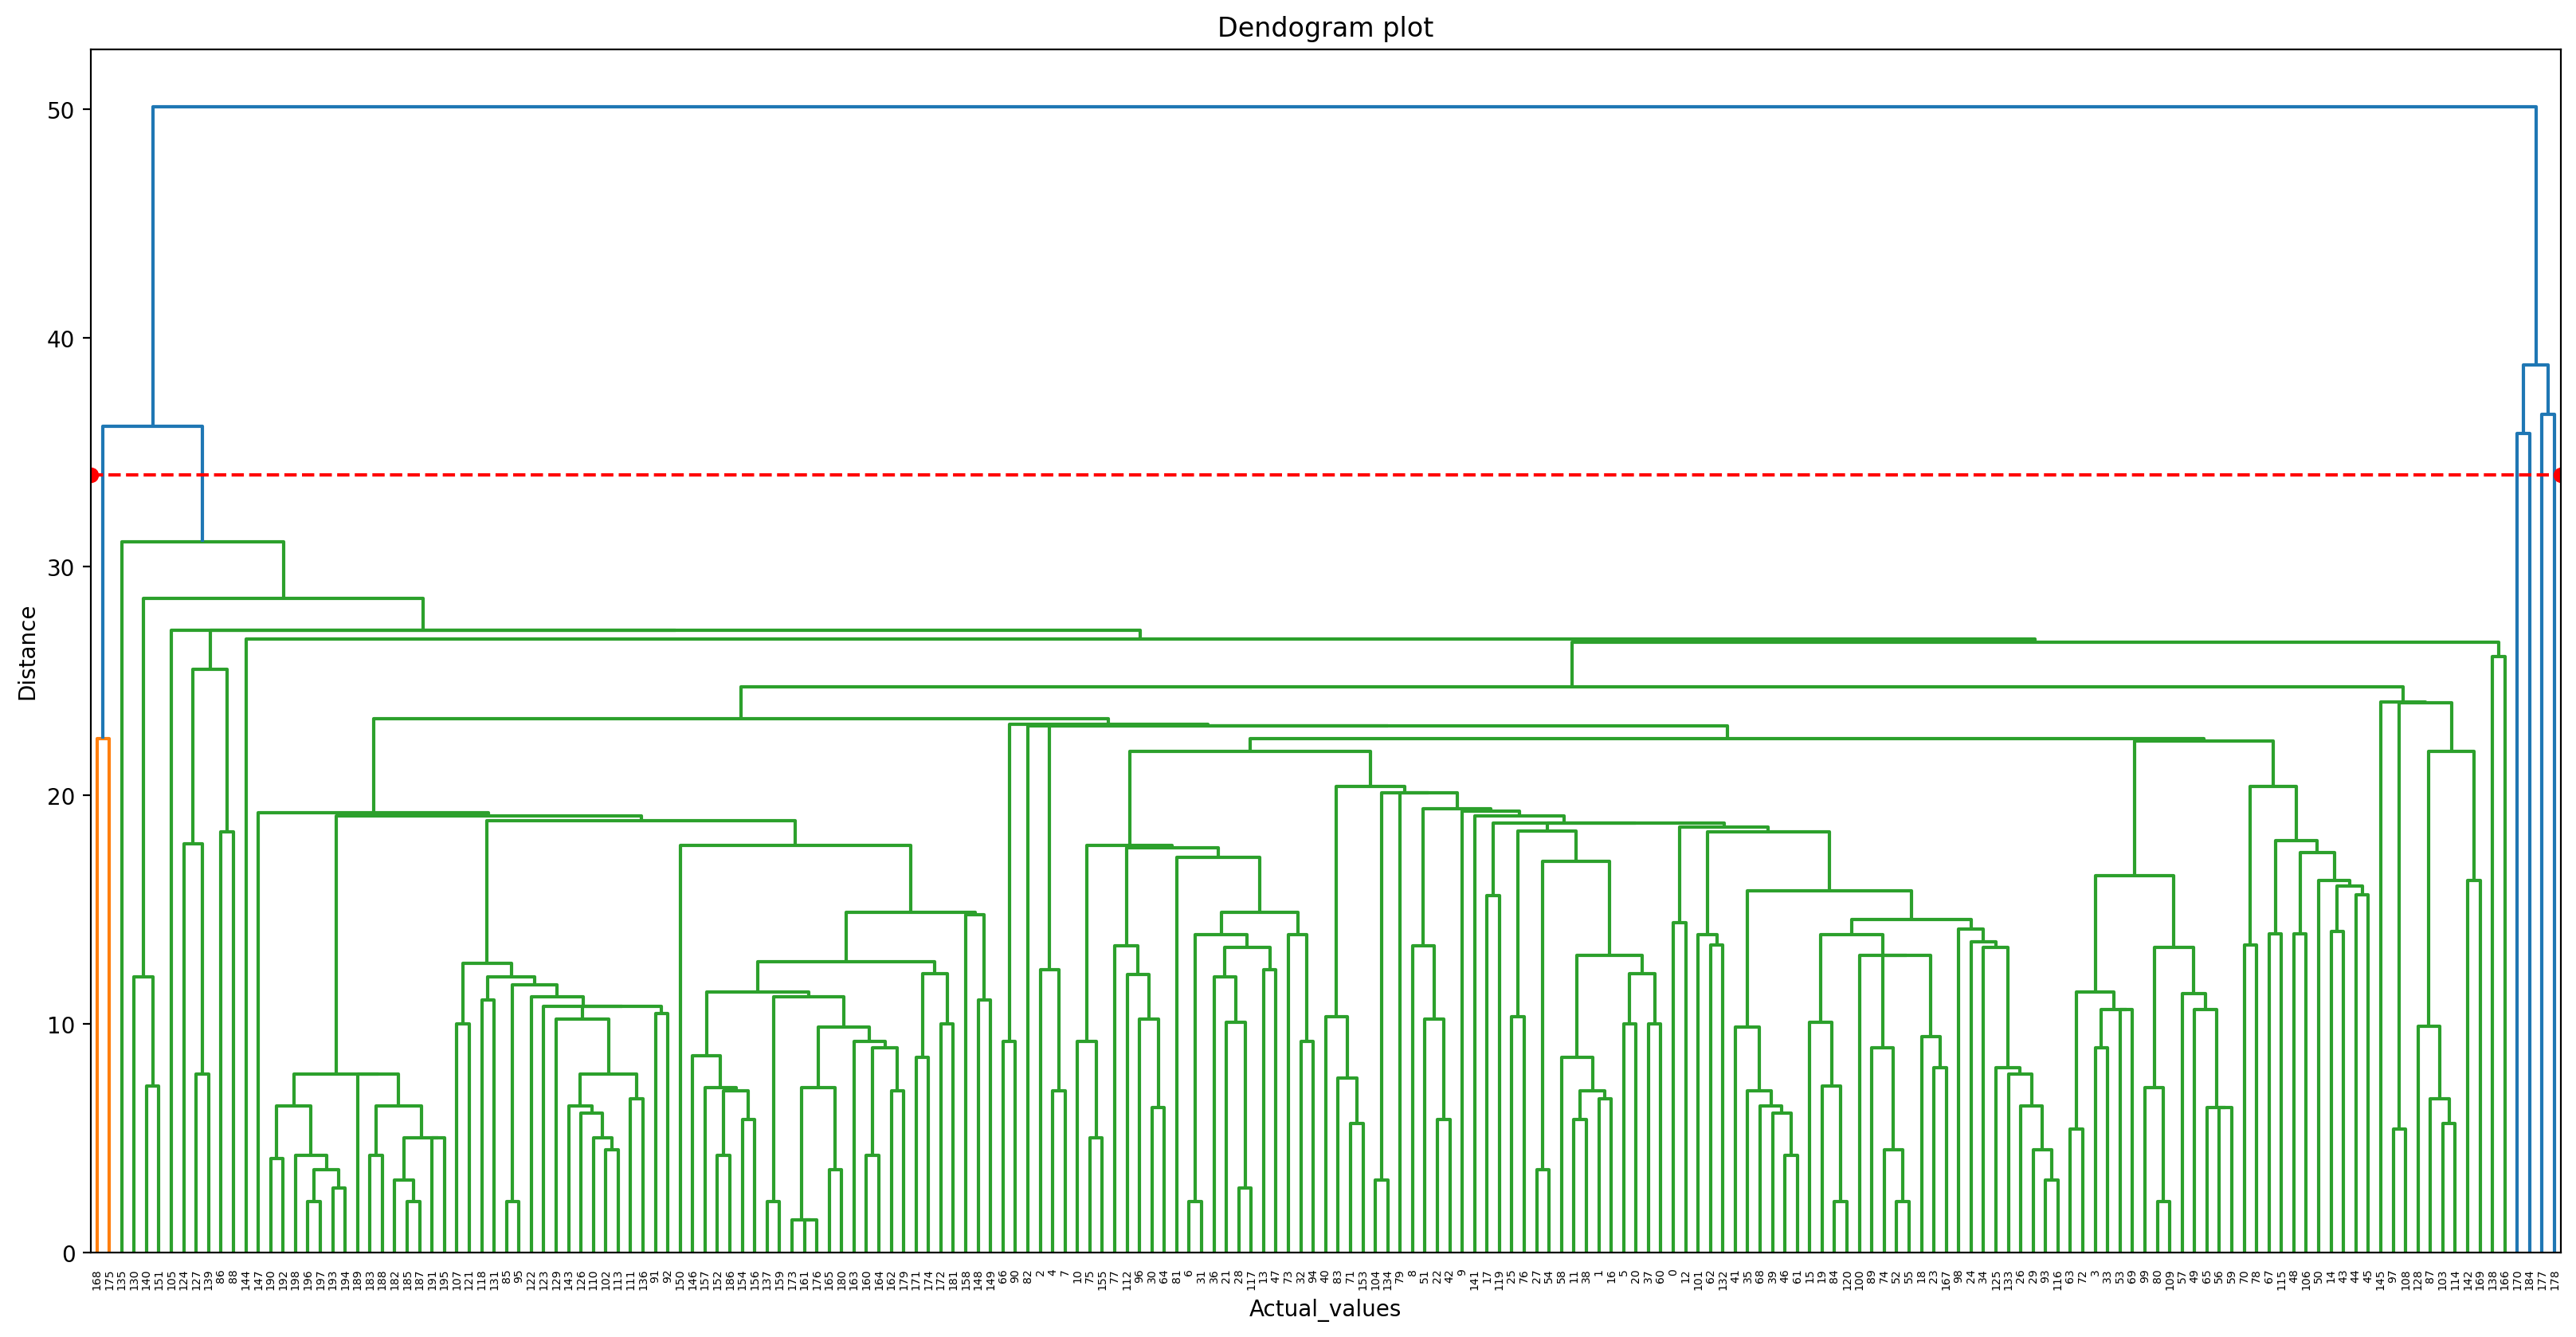

In [28]:
#Plotting a dendrogram from the linkage matrix linkage_matrix_01 and creating a line at 34
plt.figure(figsize=(20,10),dpi=200)
dendrogram_01=dendrogram(linkage_matrix_01)
plt.axhline(34, color='red', marker='o', linestyle='dashed')
plt.title('Dendogram plot')
plt.xlabel('Actual_values')
plt.ylabel('Distance');

### The truncate mode functionality in dengrogram gives the dendragram till the cluseter we mention and truncates the below appearing clusters and hows as single line

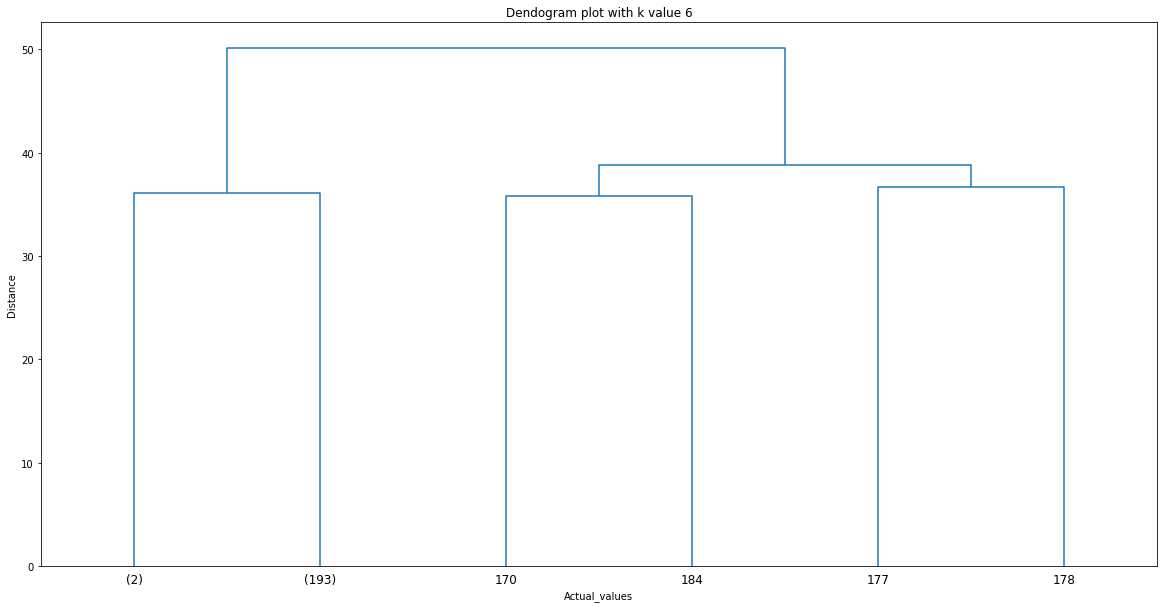

In [29]:
#Plotting a dendrogarm with truncate mdoe functionalty lastp with p value 6 that is cluster 6
plt.figure(figsize=(20,10))
dendrogram_01=dendrogram(linkage_matrix_01,truncate_mode='lastp',p=6)
plt.title('Dendogram plot with k value 6')
plt.xlabel('Actual_values')
plt.ylabel('Distance');

### Below we are choosing our guess that is cluseter 8 and one if the pair of matrix that is manhattan and average because we can see that both performing well in separting the clusters we need

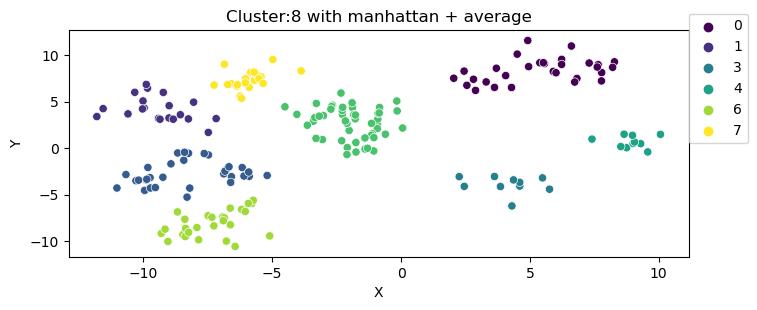

In [30]:
#Scatterplot with cluseter value 8 and affinity manhattan and linkage average my creating a model hierarchial_model_02
hierarchial_model_02=AgglomerativeClustering(n_clusters=8, affinity='manhattan', linkage='average')
label=hierarchial_model_02.fit_predict(data)
plt.figure(figsize=(8,3),dpi=100)
sns.scatterplot(data=data,x='X',y='Y',hue=label,palette='viridis')
plt.title(f'Cluster:{8} with {j[0]} + {j[1]}')
plt.legend(loc=(1,0.5))

In [31]:
linkage_matrix_02=hierarchy.linkage(hierarchial_model_02.children_)

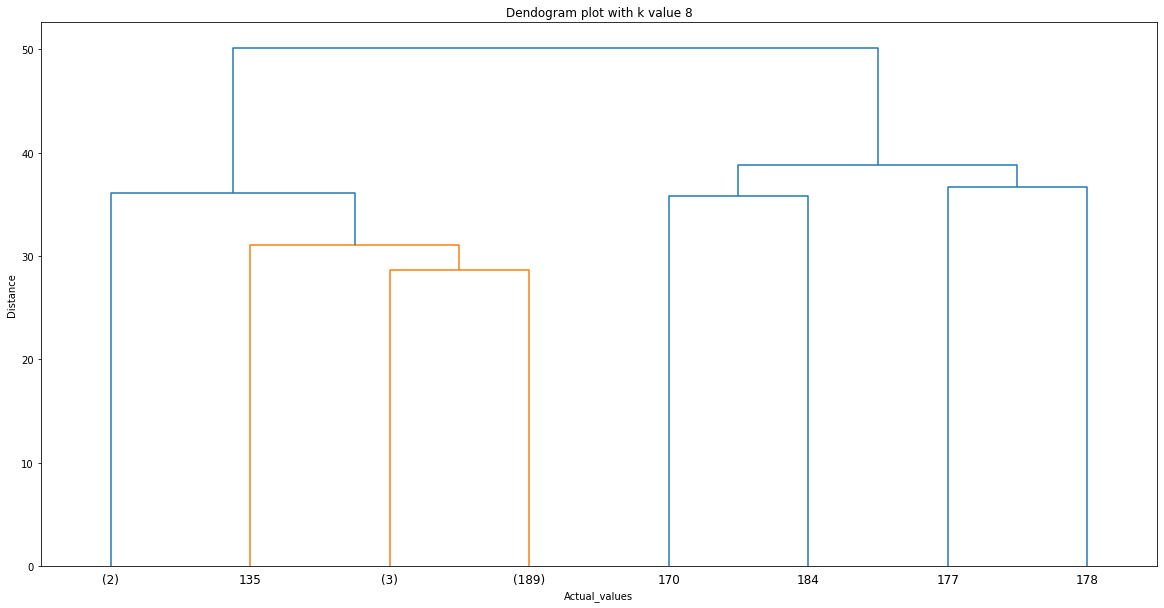

In [32]:
#Plotting a dendrogarm with truncate mdoe functionalty lastp with p value 8 that is cluster 8
plt.figure(figsize=(20,10))
dendrogram_02=dendrogram(linkage_matrix_02,truncate_mode='lastp',p=8)
plt.title('Dendogram plot with k value 8')
plt.xlabel('Actual_values')
plt.ylabel('Distance');

### Below are the plotting just to verify whether our guess is correct or not using kmeans silhouette scores

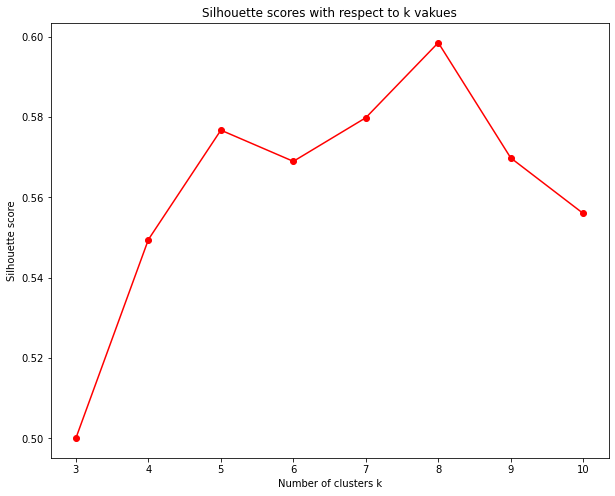

In [33]:
k_val = [3,4,5,6,7,8,9,10]
silhouette_list = []

#creating a loop with k values mentioned in the v_val list and storing the silhouette scores in list
for i in k_val:
    model = KMeans(n_clusters=i)
    label= model.fit_predict(data)
    score = silhouette_score(data, label)
    silhouette_list.append(score)

#Plotting the number of clusters and silhouette score in x and y axis
plt.figure(figsize=(10,8))
plt.plot(k_val, silhouette_list,c='r',marker='o')
plt.xlabel("Number of clusters k")
plt.ylabel("Silhouette score")
plt.title("Silhouette scores with respect to k vakues");

### From this we can see that our guess 8 also makes sense ad we got the highest silhouette score, but are not using heirachial model with metrics here. 

## Programming Assignment Details

1. You can use libraries: Numpy, Pandas, Scikit-Learn, Matplotlib and Seaborn
2. Explain each and every task that is performed for each cell. USE MARKDOWNS!!! Still you need to comment your code. 
3. If using any resource (books, internet), please make sure that you cite it within that cell.
4. Do not rename the dataset_files.

## Submission details

Fill your name and ID in the jupyter notebook for each group member in the following format:

1. First Student Name and ID: Lolita louis dmello - 1002020314
2. Second Student Name and ID: Ashik Maraliga Venkatesh - 1002023308
3. Third Student Name and ID: Sarath Kumar Devraj - 1002041910

Name your submission files:

yourLastName_Last4digitsofyourID.ipynb

EG: abc_1234_def_5678_xyz3819.ipynb

## NOTE: Only one team member will submit the file.